In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import sys, os
# sys.path.append('../src/models/')

In [2]:
import matplotlib.pyplot as plt
from src.models.train_model import Network

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


# Train network

In [3]:
net = Network(
    train_data_root_dir='../data/processed/train/',
    val_data_root_dir='../data/processed/val/',
    test_data_root_dir='../data/processed/test/',
    model_out='./models/houses_model_unet.h5'
)

In [4]:
net.train()

Epoch 1/100
28/28 [==============================] - 35s 1s/step - loss: 1.2127 - iou_score: 0.2051 - val_loss: 1.6873 - val_iou_score: 0.2418

Epoch 00001: val_iou_score improved from -inf to 0.24183, saving model to ./models/houses_model_unet.h5
Epoch 2/100
28/28 [==============================] - 17s 605ms/step - loss: 0.9880 - iou_score: 0.3185 - val_loss: 14.2887 - val_iou_score: 0.1644

Epoch 00002: val_iou_score did not improve from 0.24183
Epoch 3/100
28/28 [==============================] - 17s 606ms/step - loss: 0.9977 - iou_score: 0.3375 - val_loss: 1.0561 - val_iou_score: 0.2273

Epoch 00003: val_iou_score did not improve from 0.24183
Epoch 4/100
28/28 [==============================] - 17s 597ms/step - loss: 0.9304 - iou_score: 0.3754 - val_loss: 1.0193 - val_iou_score: 0.2880

Epoch 00004: val_iou_score improved from 0.24183 to 0.28801, saving model to ./models/houses_model_unet.h5
Epoch 5/100
28/28 [==============================] - 17s 595ms/step - loss: 0.9012 - iou_sc

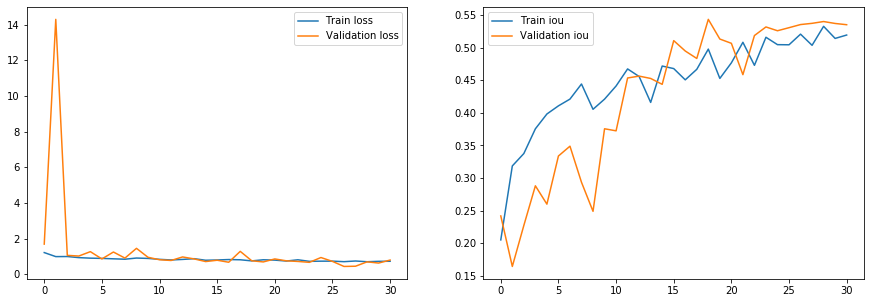

In [5]:
fig = net.plot_training_history()

In [6]:
print(net.test())

2020-02-03 20:39:44,166 - src.models.train_model - INFO - Loss: 0.60631
mean iou_score: 0.49882



Loss: 0.60631
mean iou_score: 0.49882



# Predict

In [7]:
import cv2
import numpy as np

In [8]:
def read_img_mask(root_path, image_folder, mask_folder, img_name, img_size=1472):
    img = cv2.imread(os.path.join(root_path, image_folder, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype(np.float32)
    img = img / 255
    
    mask = cv2.imread(os.path.join(root_path, mask_folder, img_name), cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (img_size, img_size))
    mask = (mask > 0).astype(np.int8)
    
    return img, mask

In [9]:
root_path = '../data/processed/test/'
image_folder = 'images/'
actual_mask_folder = 'masks/'
image_name = 'chicago1.png'

In [10]:
img, act_mask = read_img_mask(root_path, image_folder, actual_mask_folder, image_name)
X = np.expand_dims(img, axis=0)
X.shape

(1, 1472, 1472, 3)

In [11]:
pred = net.model.predict(X)

In [12]:
pred_mask = pred[0].reshape(1472, 1472)
pred_mask = (pred_mask > 0.5).astype(np.int8)
pred_mask.shape

(1472, 1472)

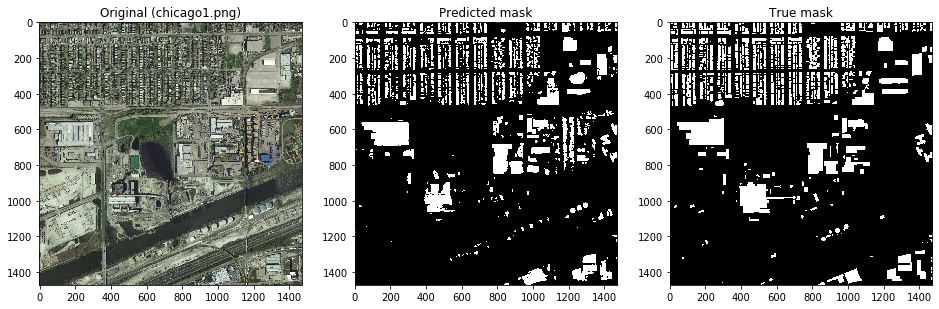

In [13]:
f, ax = plt.subplots(1, 3, figsize=(16, 16))
ax[0].imshow(img)     
ax[1].imshow(pred_mask, cmap='gray')
ax[2].imshow(act_mask, cmap='gray')
ax[0].set_title('Original ({})'.format(image_name))
ax[1].set_title('Predicted mask')
ax[2].set_title('True mask')
plt.show()